In [1]:
import json
import matplotlib.pyplot as plt

In [12]:
analysis_data_centers = ['52.95.127.226 AWS Dublin', '8.208.40.164 Alibaba London', '134.70.116.1 Oracle Montreal', '52.46.142.78 AWS N.Virginia']
analysis_data_tags = ['ETHERNET', 'LTE', 'SAT', 'WIFI']

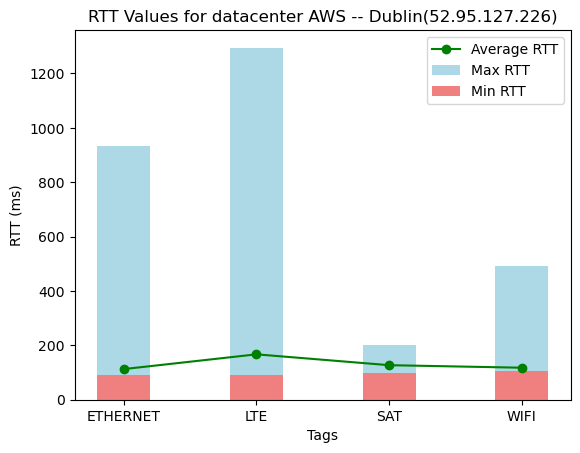

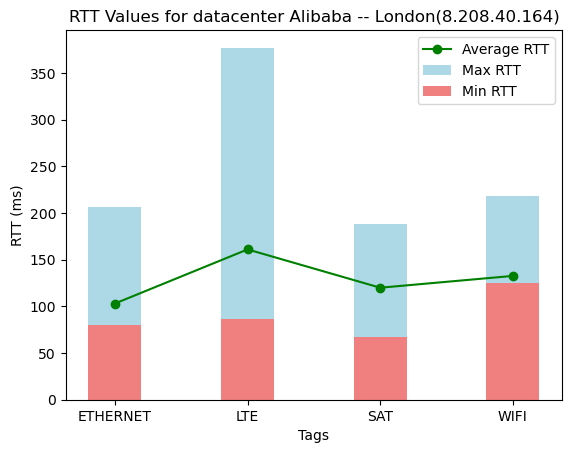

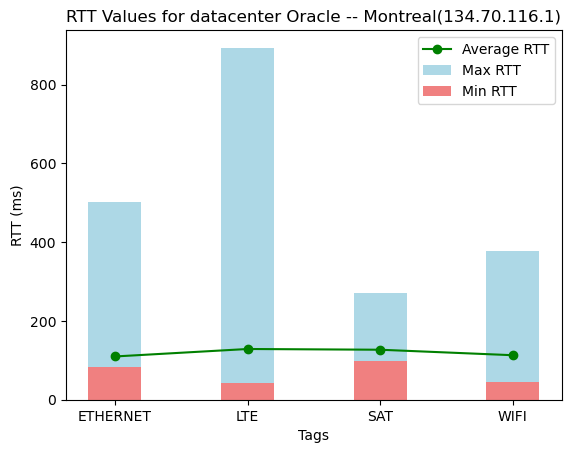

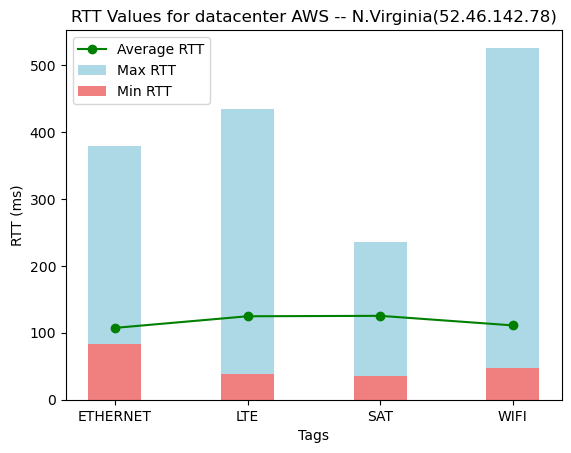

In [13]:
for each_data_center in analysis_data_centers:
    data_center_name = each_data_center.split(' ')[1] + ' -- ' + each_data_center.split(' ')[2]
    categories = []
    min_values = []
    max_values = []
    avg_values = []
    for each_data_tag in range(len(analysis_data_tags)):
        min_rtt = float('inf')
        max_rtt = float('-inf')
        total_rtt = 0.0
        total_request_count = 0
        try: 
            with open('./data/' + each_data_center.split(' ')[0] + '_' + analysis_data_tags[each_data_tag] + '.json', 'r') as file:
                json_data = json.load(file)
                for each_probe_result in json_data:
                    rtt_value_of_probe = 0.0
                    for each_packet in each_probe_result['result']:
                        if 'x' in each_packet or 'error' in each_packet:
                            continue
                        else:
                            rtt_value_of_probe += each_packet['rtt']
                    rtt_value_of_probe = rtt_value_of_probe / float(len(each_probe_result['result']))

                    if min_rtt >= rtt_value_of_probe and rtt_value_of_probe != 0.0:
                        min_rtt = rtt_value_of_probe

                    if max_rtt <= rtt_value_of_probe:
                        max_rtt = rtt_value_of_probe

                    total_rtt += rtt_value_of_probe
                    total_request_count += 1
    # If you want to see values (In addition to graph), or debug the code; pelase remove below comments (below 4 lines)
    #         print(each_data_center + ' --- ' + analysis_data_tags[each_data_tag])
    #         print('Min RTT: ' + str(min_rtt))
    #         print('Max RTT: ' + str(max_rtt))
    #         print('Average RTT: ' + str(total_rtt / float(total_request_count)))
        except Exception as e:
            continue
        
        categories.append(analysis_data_tags[each_data_tag])
        min_values.append(min_rtt)
        max_values.append(max_rtt)
        avg_values.append(total_rtt / float(total_request_count))
    
    bar_width = 0.4
    bar_positions = range(len(categories))
    
    plt.bar(bar_positions, max_values, width=bar_width, color='lightblue', label='Max RTT')
    plt.bar(bar_positions, min_values, width=bar_width, color='lightcoral', label='Min RTT')
    
    plt.plot(categories, avg_values, marker='o', color='green', label='Average RTT')
    
    plt.xlabel('Tags')
    plt.ylabel('RTT (ms)')
    plt.title('RTT Values for datacenter ' + data_center_name + '(' + each_data_center.split(' ')[0] + ")")
    
    plt.legend()

    plt.show()